# Table of Contents
 <p>

In [2]:
#!python
"""
Find the brightest pixel coordinate of a image.

@author: Bhishan Poudel

@date:  Oct 27, 2017

@email: bhishanpdl@gmail.com

"""
# Imports
import time
import numpy as np
from astropy.io import fits
import subprocess
from scipy.ndimage import measurements



def brightest_coord():
    with open('centroids_f8.txt','w') as fo:
        for i in range(201):
            pre = '/Users/poudel/Research/a01_data/original_data/HST_ACS_WFC_f814w/'
            infile = '{}/sect23_f814w_gal{}.fits'.format(pre,i)
            dat = fits.getdata(infile)
            x,y = np.unravel_index(np.argmax(dat), dat.shape)
            x,y = int(y+1) , int(x+1)
            print("{} {}".format(x, y), file=fo)
            
def find_centroid():
    with open('centroids_f8_scipy.txt','w') as fo:
        for i in range(201):
            pre = '/Users/poudel/Research/a01_data/original_data/HST_ACS_WFC_f814w/'
            infile = '{}/sect23_f814w_gal{}.fits'.format(pre,i)
            dat = fits.getdata(infile)
            x,y = measurements.center_of_mass(dat)
            x,y = int(y+1) , int(x+1)
            print("{} {}".format(x, y), file=fo)

    

def main():
    """Run main function."""
    
#     bright_coord()
#     find_centroid()
    
    # # checking
    # i = 0
    # pre = '/Users/poudel/Research/a01_data/original_data/HST_ACS_WFC_f814w/'
    # infile = '{}/sect23_f814w_gal{}.fits'.format(pre,i)
    # ds9 = '/Applications/ds9.app/Contents/MacOS/ds9'
    # subprocess.call('{} {}'.format(ds9, infile), shell=True)
    # when zooming we can see brightest pixel is at 296, 307 image coord.
    
            
if __name__ == "__main__":
        import time, os
        
        # Beginning time
        program_begin_time = time.time()
        begin_ctime        = time.ctime()
                    
        #  Run the main program
        main()
        
        # Print the time taken
        program_end_time = time.time()
        end_ctime        = time.ctime()
        seconds          = program_end_time - program_begin_time
        m, s             = divmod(seconds, 60)
        h, m             = divmod(m, 60)
        d, h             = divmod(h, 24)
        print("\n\nBegin time: ", begin_ctime)
        print("End   time: ", end_ctime, "\n")
        print("Time taken: {0: .0f} days, {1: .0f} hours, \
              {2: .0f} minutes, {3: f} seconds.".format(d, h, m, s))
        print("\n")
        




Begin time:  Thu May 23 10:59:20 2019
End   time:  Thu May 23 10:59:20 2019 

Time taken:  0 days,  0 hours,                0 minutes,  0.000011 seconds.




In [3]:
!head -n 5 centroids_f8.txt

296 307
313 306
302 312
310 304
303 302


In [4]:
!head -n 5 centroids_f8_scipy.txt

295 306
312 306
301 311
309 303
304 302


In [5]:
def find_max_coord(dat):
    print("dat = \n{}".format(dat))
    maxpos = np.unravel_index(np.argmax(dat), dat.shape)
    print("maxpos = {}".format(maxpos))

In [6]:
with open('example_data.txt','w') as fo:
    data = """0.1 0.5
    0.0 0.0
    4.0 3.0
    0.0 0.0
    1.0 1.0
    """
    fo.write(data)

dat = np.genfromtxt('example_data.txt')
find_max_coord(dat)

dat = 
[[ 0.1  0.5]
 [ 0.   0. ]
 [ 4.   3. ]
 [ 0.   0. ]
 [ 1.   1. ]]
maxpos = (2, 0)


In [7]:
x,y = measurements.center_of_mass(dat)

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

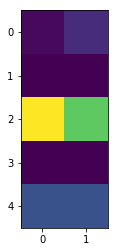

In [14]:
plt.imshow(dat) # default is RGB

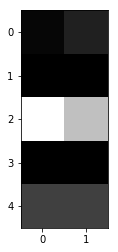

In [21]:
plt.imshow(dat,cmap='gray', vmin=int(dat.min()), vmax=int(dat.max()))

In [22]:
# we can see brightest pixel is x=0 and y = 2
# or, if we count from 1,  x = 1 and y =3

In [31]:
measurements.center_of_mass(dat)

(2.291666666666667, 0.46875)

In [33]:
x,y = measurements.center_of_mass(dat)
x,y = int(x), int(y)
x,y

(2, 0)

In [35]:
dat

array([[ 0.1,  0.5],
       [ 0. ,  0. ],
       [ 4. ,  3. ],
       [ 0. ,  0. ],
       [ 1. ,  1. ]])

In [37]:
dat[2][0]

4.0

In [38]:
# Numpy index is dat[2][0]
# but image shows x=0 and y =2.

In [25]:
x,y = measurements.center_of_mass(dat)
x,y = int(y), int(x)

x,y

(0, 2)

In [30]:
dat[2][0]

4.0

In [39]:
# Looking at mean

In [41]:
dat.mean(axis=0)

array([ 1.02,  0.9 ])

In [44]:
np.argmax(dat)

4

In [46]:
np.unravel_index(4,dat.shape)

(2, 0)